In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.utils import to_categorical

In [2]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
# Reshape and normalize images
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255.0
# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Define the model
model = models.Sequential()
# Input layer with normalization
model.add(layers.InputLayer(input_shape=(28, 28, 1)))
# Block 1
model.add(layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.05))
# Block 2
model.add(layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2))) # Transition Layer 1
# Block 3
model.add(layers.Conv2D(24, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
# Block 4
model.add(layers.Conv2D(24, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2))) # Transition Layer 2
# Block 5
model.add(layers.Conv2D(24, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
# Final Classification Block
model.add(layers.GlobalAveragePooling2D()) # Replaces Flatten() + Dense()
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 24)     │         3,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 24)     │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 24)       │         5,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 24)       │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 24)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 24)       │         5,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2, 2, 24)       │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 24)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 24)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,042 (66.57 KB)

 Trainable params: 16,834 (65.76 KB)

 Non-trainable params: 208 (832.00 B)

In [4]:
# Define a callback to reduce learning rate if validation loss plateaus
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, min_lr=1e-5)

In [5]:
# Train the model for 20 epochs
history = model.fit(x_train, y_train,
                    batch_size=128, # Good balance of speed and stability
                    epochs=20,
                    validation_data=(x_test, y_test), # Using test set as validation
                    callbacks=[lr_scheduler],
                    verbose=1)

# Evaluate the final model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'\nFinal Test Accuracy: {test_acc:.4f}')

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 171ms/step - accuracy: 0.7851 - loss: 0.7887 - val_accuracy: 0.9653 - val_loss: 0.1395 - learning_rate: 0.0010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 169ms/step - accuracy: 0.9784 - loss: 0.0849 - val_accuracy: 0.9860 - val_loss: 0.0456 - learning_rate: 0.0010
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 169ms/step - accuracy: 0.9845 - loss: 0.0531 - val_accuracy: 0.9905 - val_loss: 0.0332 - learning_rate: 0.0010
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 171ms/step - accuracy: 0.9889 - loss: 0.0390 - val_accuracy: 0.9918 - val_loss: 0.0261 - learning_rate: 0.0010
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 172ms/step - accuracy: 0.9903 - loss: 0.0333 - val_accuracy: 0.9912 - val_loss: 0.0273 - learning_rate: 0.0010
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9927 - loss: 0.0262
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 172ms/step - accuracy: 0.992

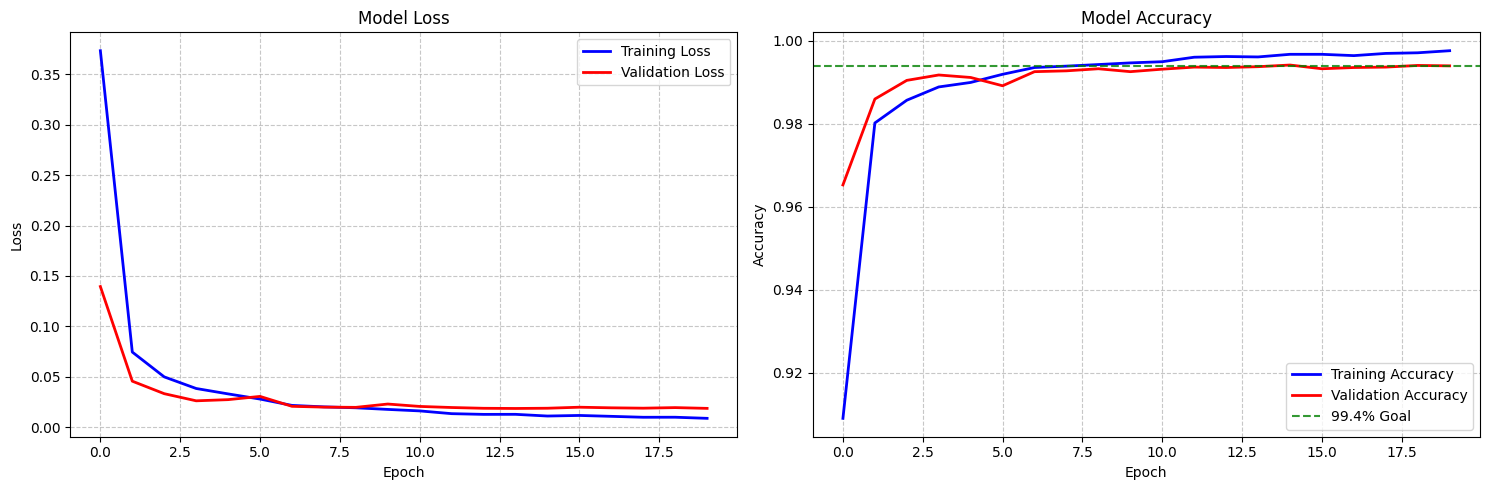

In [6]:
import matplotlib.pyplot as plt

# Assuming you have the 'history' object from model.fit()
# history = model.fit(...)

# Create a figure with two side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot Loss on the first subplot (ax1)
ax1.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
ax1.plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2)
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot Accuracy on the second subplot (ax2)
ax2.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linewidth=2)
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
ax2.grid(True, linestyle='--', alpha=0.7)

# Mark our goal of 99.4% accuracy
ax2.axhline(y=0.994, color='green', linestyle='--', alpha=0.8, label='99.4% Goal')
ax2.legend(loc='lower right')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()